In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# 1 - Load dataset
df = pd.read_csv('./data/wines.csv')

In [3]:
df.head()

,Class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280-OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
# 2 - Use Class column as target
y = df['Class']

In [6]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [8]:
# 3 - Checking how many classes 
y.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [10]:
y_cat = pd.get_dummies(y)

In [13]:
# 4 - Use all the other columns other than Class
X = df.drop('Class', axis=1)

In [15]:
X.shape

(178, 13)

In [16]:
import seaborn as sns

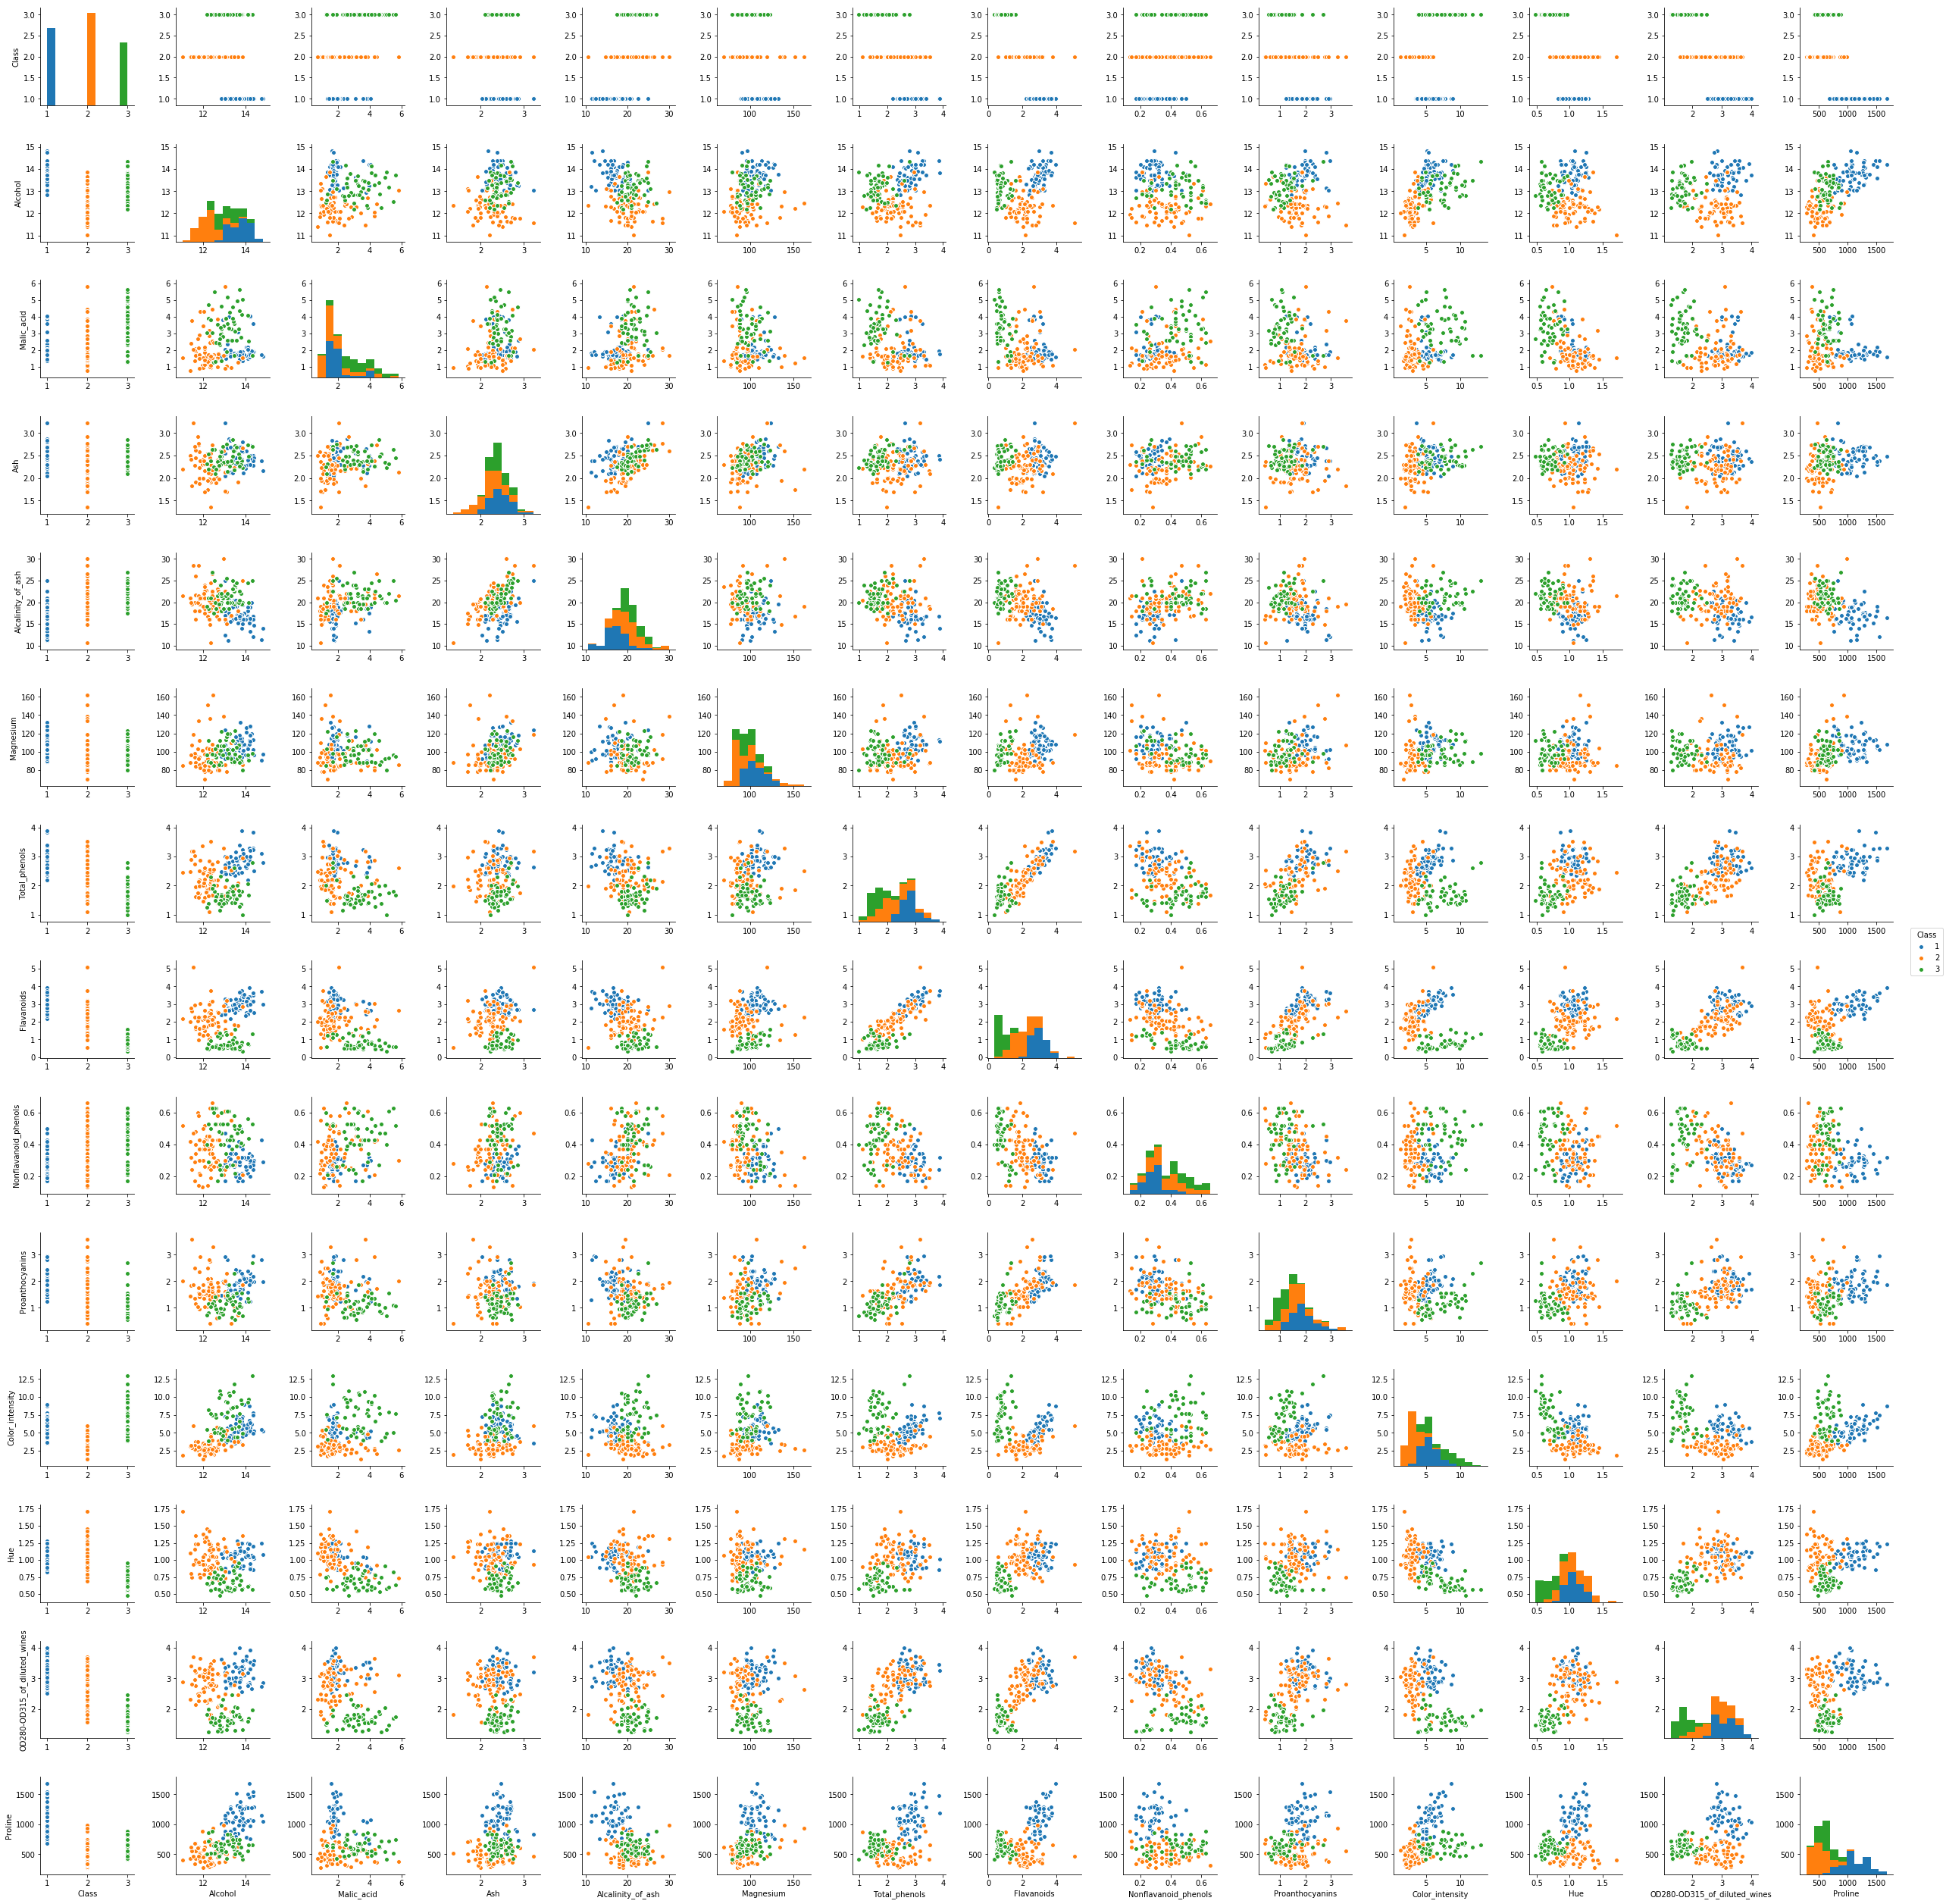

In [17]:
# 4 - Plot with seaborn
sns.pairplot(df, hue='Class')

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc = StandardScaler()

In [20]:
Xsc = sc.fit_transform(X)

In [26]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
import keras.backend as K

In [34]:
# 6 - Build a model with atleast one hidden layer
K.clear_session()
model = Sequential()
# Choose a optimizer
model.add(Dense(5, input_shape=(13,),
               kernel_initializer='he_normal',
               activation='relu'))
model.add(Dense(3, activation='softmax'))
# Choose a cost function
model.compile(RMSprop(lr=0.1),
             'categorical_crossentropy',
             metrics=['accuracy'])

In [35]:
# train model
model.fit(Xsc, y_cat.values,
          batch_size=8,
          epochs=10,
          verbose=1,
          validation_split=.2)

Train on 142 samples, validate on 36 samples
Epoch 1/10
142/142 [==============================] - 0s 2ms/step - loss: 0.4280 - acc: 0.8380 - val_loss: 1.0471 - val_acc: 0.7778
Epoch 2/10
142/142 [==============================] - 0s 286us/step - loss: 0.0616 - acc: 0.9859 - val_loss: 0.6366 - val_acc: 0.8611
Epoch 3/10
142/142 [==============================] - 0s 299us/step - loss: 0.0757 - acc: 0.9789 - val_loss: 0.3341 - val_acc: 0.9444
Epoch 4/10
142/142 [==============================] - 0s 463us/step - loss: 0.0562 - acc: 0.9648 - val_loss: 0.0368 - val_acc: 0.9722
Epoch 5/10
142/142 [==============================] - 0s 278us/step - loss: 0.0156 - acc: 0.9859 - val_loss: 0.1753 - val_acc: 0.9444
Epoch 6/10
142/142 [==============================] - 0s 325us/step - loss: 0.0373 - acc: 0.9789 - val_loss: 0.0327 - val_acc: 0.9722
Epoch 7/10
142/142 [==============================] - 0s 233us/step - loss: 0.0043 - acc: 1.0000 - val_loss: 0.0732 - val_acc: 0.9722
Epoch 8/10
142/142 

In [45]:
test_data = pd.read_csv('./data/test_wines.csv')
test_data.head()
test_X = test_data.drop('Class', axis=1)

In [46]:
test_Xsc = sc.fit_transform(test_X)

In [48]:
result = model.predict(test_Xsc)

In [49]:
for r in result:
    print(r)

[  9.99998569e-01   1.43526620e-06   4.02770308e-12]
[  2.25308773e-15   1.00000000e+00   8.56572656e-17]
[  9.99997735e-01   2.23024426e-06   1.43827252e-08]


# Exercise 2

In [64]:
# Build a deep fully connected network
K.clear_session()
model = Sequential()
# Layer 1: 8 nodes
# Layer 2: 5 nodes
# Layer 3: 2 nodes
# Layer 4: 3 nodes
model.add(Dense(8, input_shape=(13,),
               kernel_initializer='he_normal',
               activation='tanh'))
model.add(Dense(5, kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(2, kernel_initializer='he_normal', activation='tanh'))
model.add(Dense(3, activation='softmax'))
# Choose a cost function
model.compile(RMSprop(lr=0.5),
             'categorical_crossentropy',
             metrics=['accuracy'])

In [65]:
model.fit(Xsc, y_cat.values,
          batch_size=16,
          epochs=20,
          verbose=1)

Epoch 1/20
178/178 [==============================] - 0s 2ms/step - loss: 1.2754 - acc: 0.4944
Epoch 2/20
178/178 [==============================] - 0s 139us/step - loss: 1.0288 - acc: 0.5449
Epoch 3/20
178/178 [==============================] - 0s 150us/step - loss: 0.8163 - acc: 0.6629
Epoch 4/20
178/178 [==============================] - 0s 144us/step - loss: 0.6853 - acc: 0.7360
Epoch 5/20
178/178 [==============================] - 0s 153us/step - loss: 0.4625 - acc: 0.8596
Epoch 6/20
178/178 [==============================] - 0s 162us/step - loss: 0.4433 - acc: 0.8315
Epoch 7/20
178/178 [==============================] - 0s 158us/step - loss: 0.4333 - acc: 0.8258
Epoch 8/20
178/178 [==============================] - 0s 155us/step - loss: 0.6889 - acc: 0.7753
Epoch 9/20
178/178 [==============================] - 0s 168us/step - loss: 0.5408 - acc: 0.7809
Epoch 10/20
178/178 [==============================] - 0s 120us/step - loss: 0.7713 - acc: 0.8146
Epoch 11/20
178/178 [==========

In [66]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 9         
Total params: 178
Trainable params: 178
Non-trainable params: 0
_________________________________________________________________


In [71]:
inp = model.layers[0].input
out = model.layers[2].output

In [72]:
features_function = K.function([inp], [out])

In [73]:
features = features_function([Xsc])[0]

In [74]:
features.shape

(178, 2)

ValueError: c of shape (178, 3) not acceptable as a color sequence for x with size 178, y with size 178

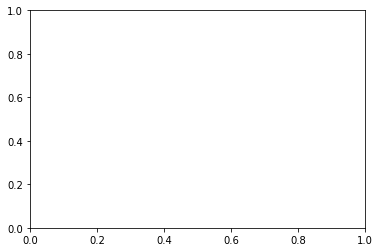

In [75]:
plt.scatter(features[:,0], features[:,1], c=y_cat)